In [545]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [546]:
demography = pd.read_excel('data/all.xlsx')

In [547]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [548]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [549]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.341935,72.561290,0.426645
Czech cuisine,53.896739,55.793478,0.393967
Italian cuisine,51.000000,82.360248,0.436832


In [550]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.38
Czech cuisine,54.0,38.0,0.34
Italian cuisine,53.0,45.0,0.37


# Favourite category

In [551]:
demography.value_counts('Favourite category')

Favourite category
Czech cuisine      184
Italian cuisine    161
Asian cuisine      155
dtype: int64

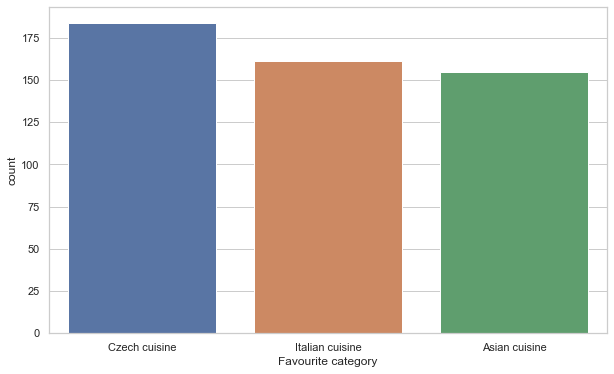

In [552]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
fav = demography.value_counts('Favourite category')
fav = pd.DataFrame(fav).rename(columns={0:'count'})
fav.reset_index(inplace=True)
sns.barplot(x='Favourite category', y='count', data=fav);


# Ad Type

In [553]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          244
print-on-bus              79
citylight                 68
promo stand small         39
billboard                 33
hostess on the street     33
radio spot                 4
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [554]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

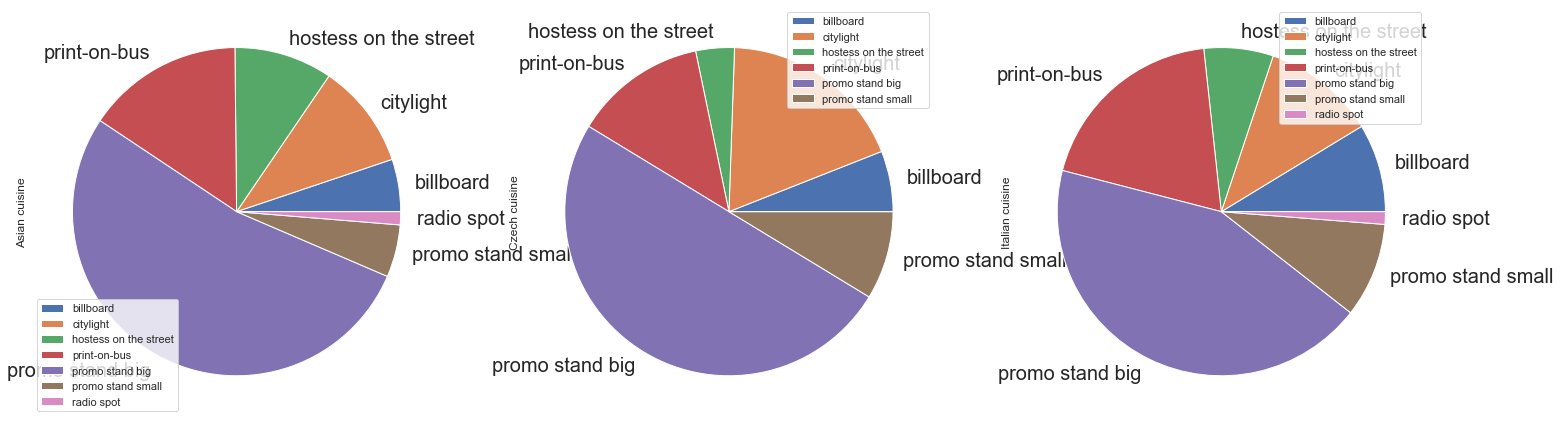

In [555]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [556]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [557]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [558]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

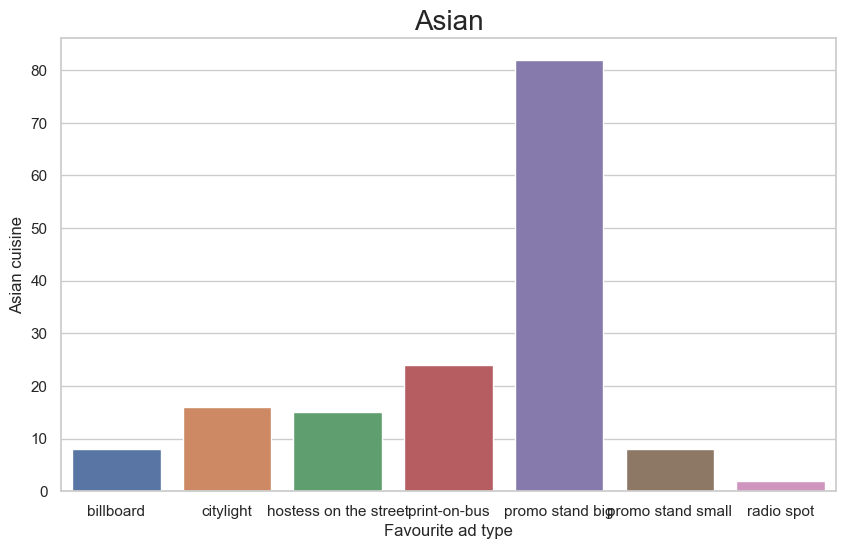

In [559]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

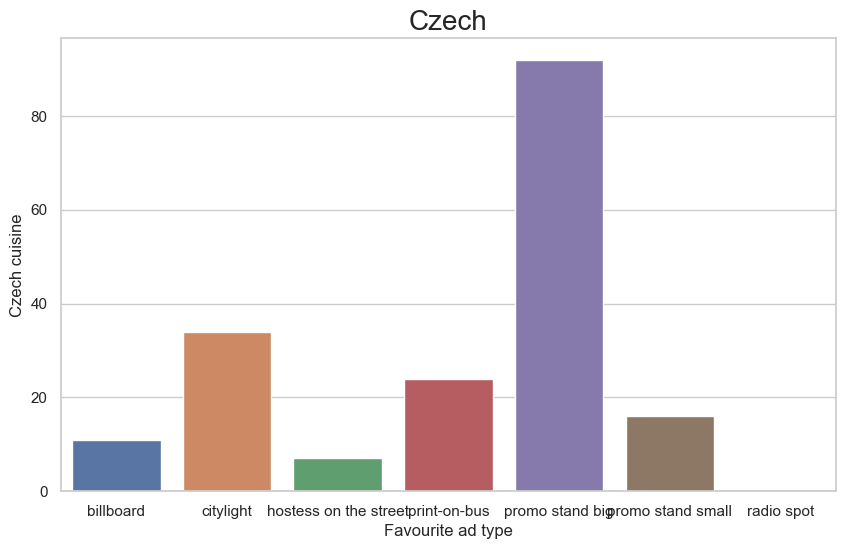

In [560]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

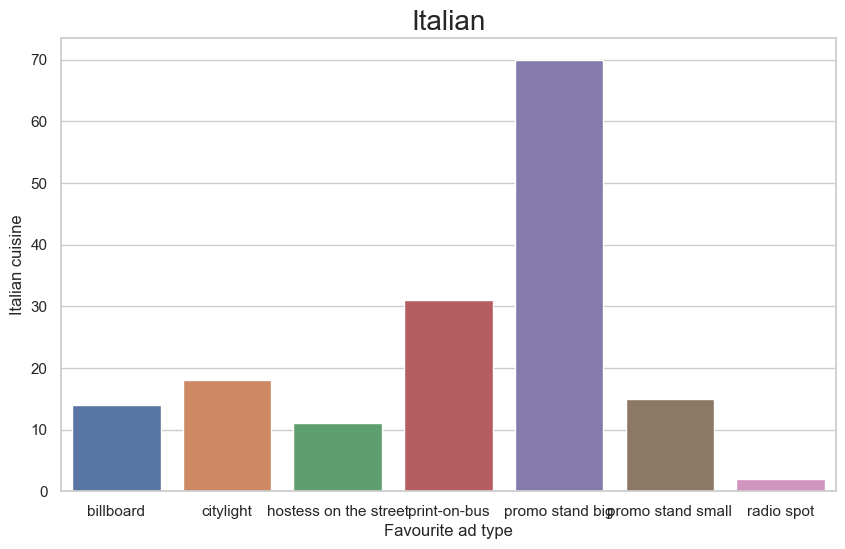

In [561]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

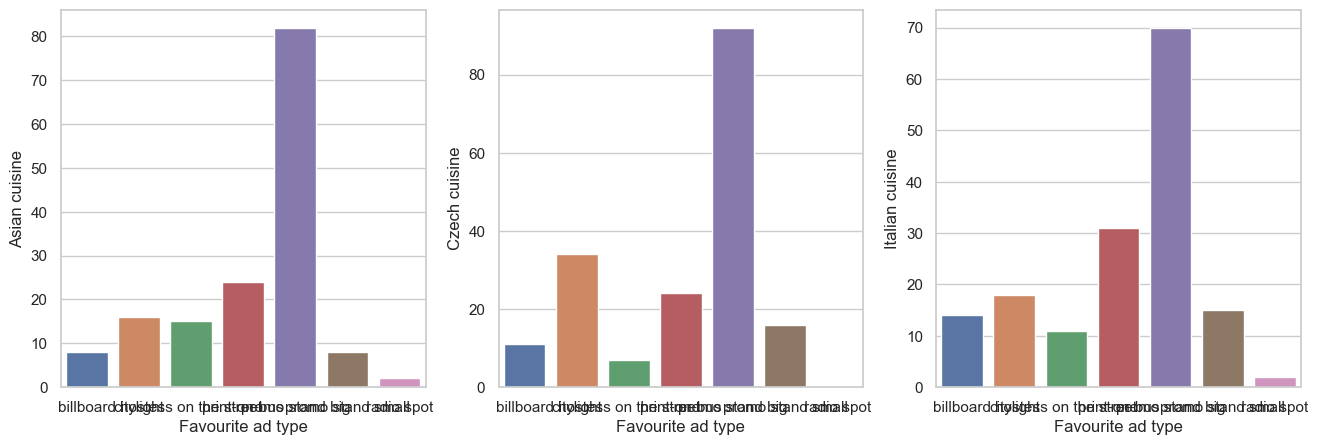

In [562]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [563]:
cuisine = demography['Favourite category'] == 'Czech cuisine'

In [564]:
ad = demography['Favourite ad type'] == 'promo stand big'

In [565]:
cz_df = demography[cuisine & ad]

In [566]:
top_locations = cz_df.describe(include='object')

In [572]:
top_locations.drop(['count', 'unique'], inplace=True)

In [577]:
top_locations.transpose().reset_index().drop([0,1,2,3])

,index,top,freq
4,MON 0-8h,Industrial district,34
5,MON 8-16h,Industrial district,39
6,MON 16-24h,Housing district,69
7,TUE 0-8h,Industrial district,33
8,TUE 8-16h,Industrial district,34
9,TUE 16-24h,Housing district,64
10,WED 0-8h,Industrial district,34
11,WED 8-16h,Industrial district,34
12,WED 16-24h,Housing district,43
13,THU 0-8h,Outskirts,34


In [568]:
metriki = cz_df.describe()

In [578]:
metriki.loc[['mean', '50%']].transpose()

,mean,50%
Age,52.510870,50.00
Weekly income,53.739130,39.50
Preferred quality,0.390326,0.35


# WIP

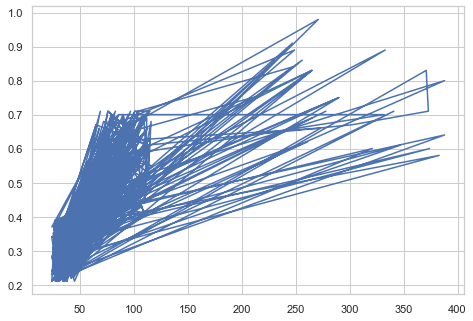

In [570]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [571]:
demography.groupby(['Favourite category']).describe(include=['object'])

Name                 Gender                      \
                   count unique top freq  count unique     top freq   
Favourite category                                                    
Asian cuisine        155    119  JG    4    155      2  Female   79   
Czech cuisine        184    134  JM    4    184      2    Male   99   
Italian cuisine      158    119  SK    4    161      2  Female   94   

                   Favourite ad type         ...             SUN 0-8h       \
                               count unique  ...                  top freq   
Favourite category                           ...                             
Asian cuisine                    155      7  ...      Office district   43   
Czech cuisine                    184      6  ...  Industrial district   69   
Italian cuisine                  161      7  ...            Outskirts   45   

                   SUN 8-16h                                  SUN 16-24h  \
                       count unique                  top freq      count   
Favourite category                                                         
Asian cuisine            155      5            Outskirts   46        155   
Czech cuisine            184      5            Outskirts   65        184   
Italian cuisine          161      5  Industrial district   43        161   

                                                  
                   unique               top freq  
Favourite category                                
Asian cuisine           4  Housing district  110  
Czech cuisine           4  Housing district  156  
Italian cuisine         5  Housing district  120  

[3 rows x 96 columns]